In [ ]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.compiler import transpile
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import fake_backend # example backend
from qiskit.transpiler import CouplingMap
from qiskit.converters import circuit_to_dag, dag_to_circuit
from collections import OrderedDict
import qiskit
from fez import FakeFez

def remove_idle_qwires(circ):
    dag = circuit_to_dag(circ)

    idle_wires = list(dag.idle_wires())
    for w in idle_wires:
        dag._remove_idle_wire(w)
        dag.qubits.remove(w)

    dag.qregs = OrderedDict()

    return dag_to_circuit(dag)

def visualize_qasm(path: str):
    """
    Load a QASM file and display its circuit diagram.
    """
    qc = QuantumCircuit.from_qasm_file(path)
    return qc.draw(output="mpl")

def visualize_qasm_optimised(path: str):
    """Load a QASM file, optimise, display circuit diagram"""

    qc_with_ancilla = QuantumCircuit.from_qasm_file(path)
    qc = remove_idle_qwires(qc_with_ancilla)
    backend = FakeFez()
    config = backend.configuration()
    transpiled_qc = qiskit.compiler.transpile(circuits = qc, basis_gates=config.basis_gates, coupling_map=config.coupling_map)
    return transpiled_qc.draw(output = "mpl", idle_wires=False)

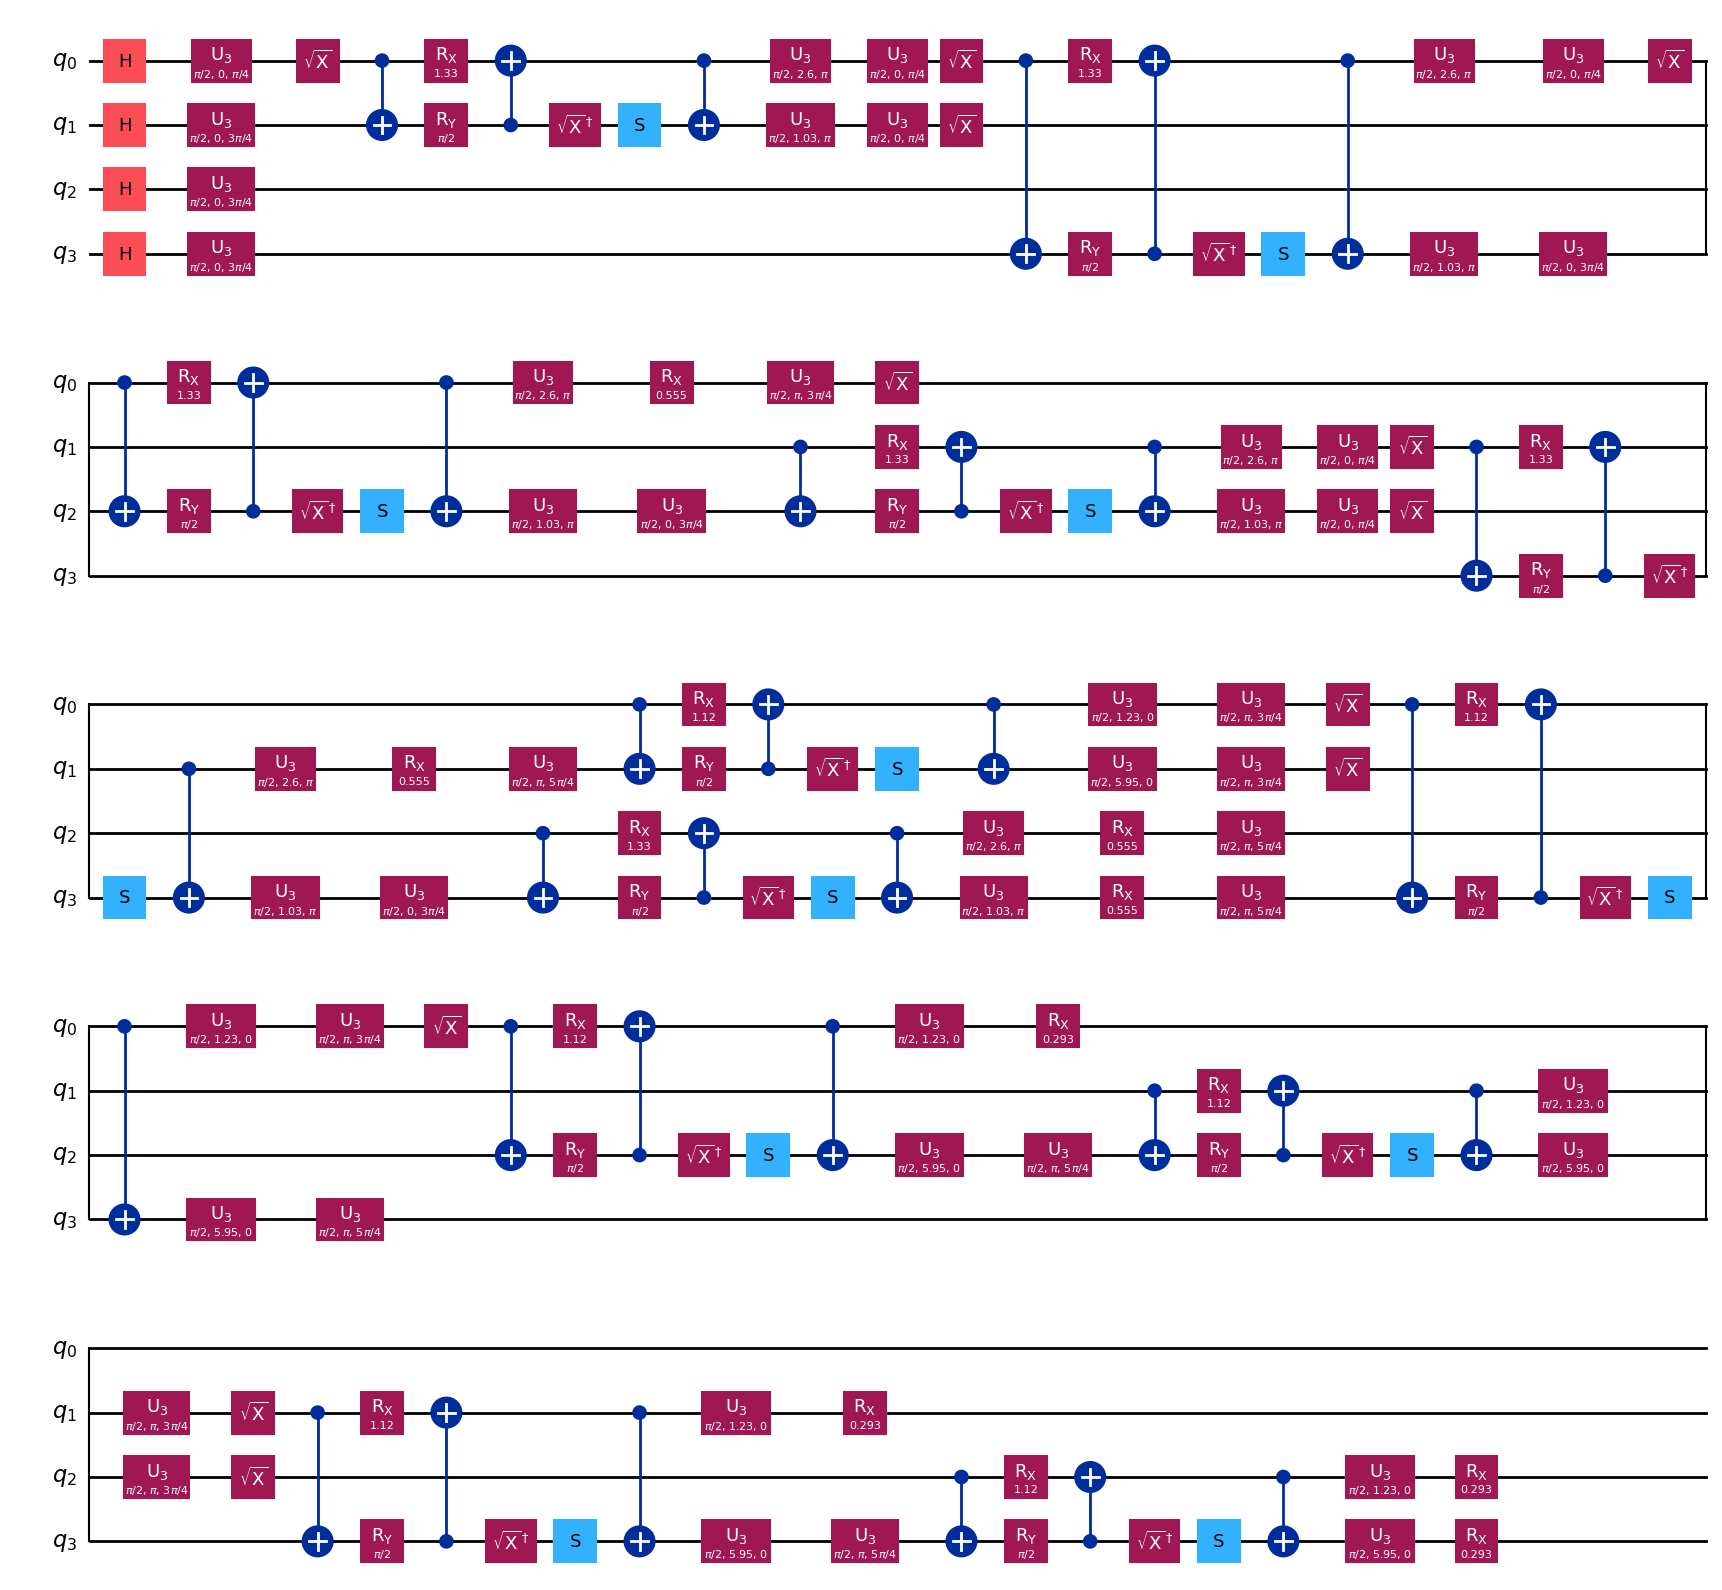

In [34]:
visualize_qasm("circuits/6.qasm")

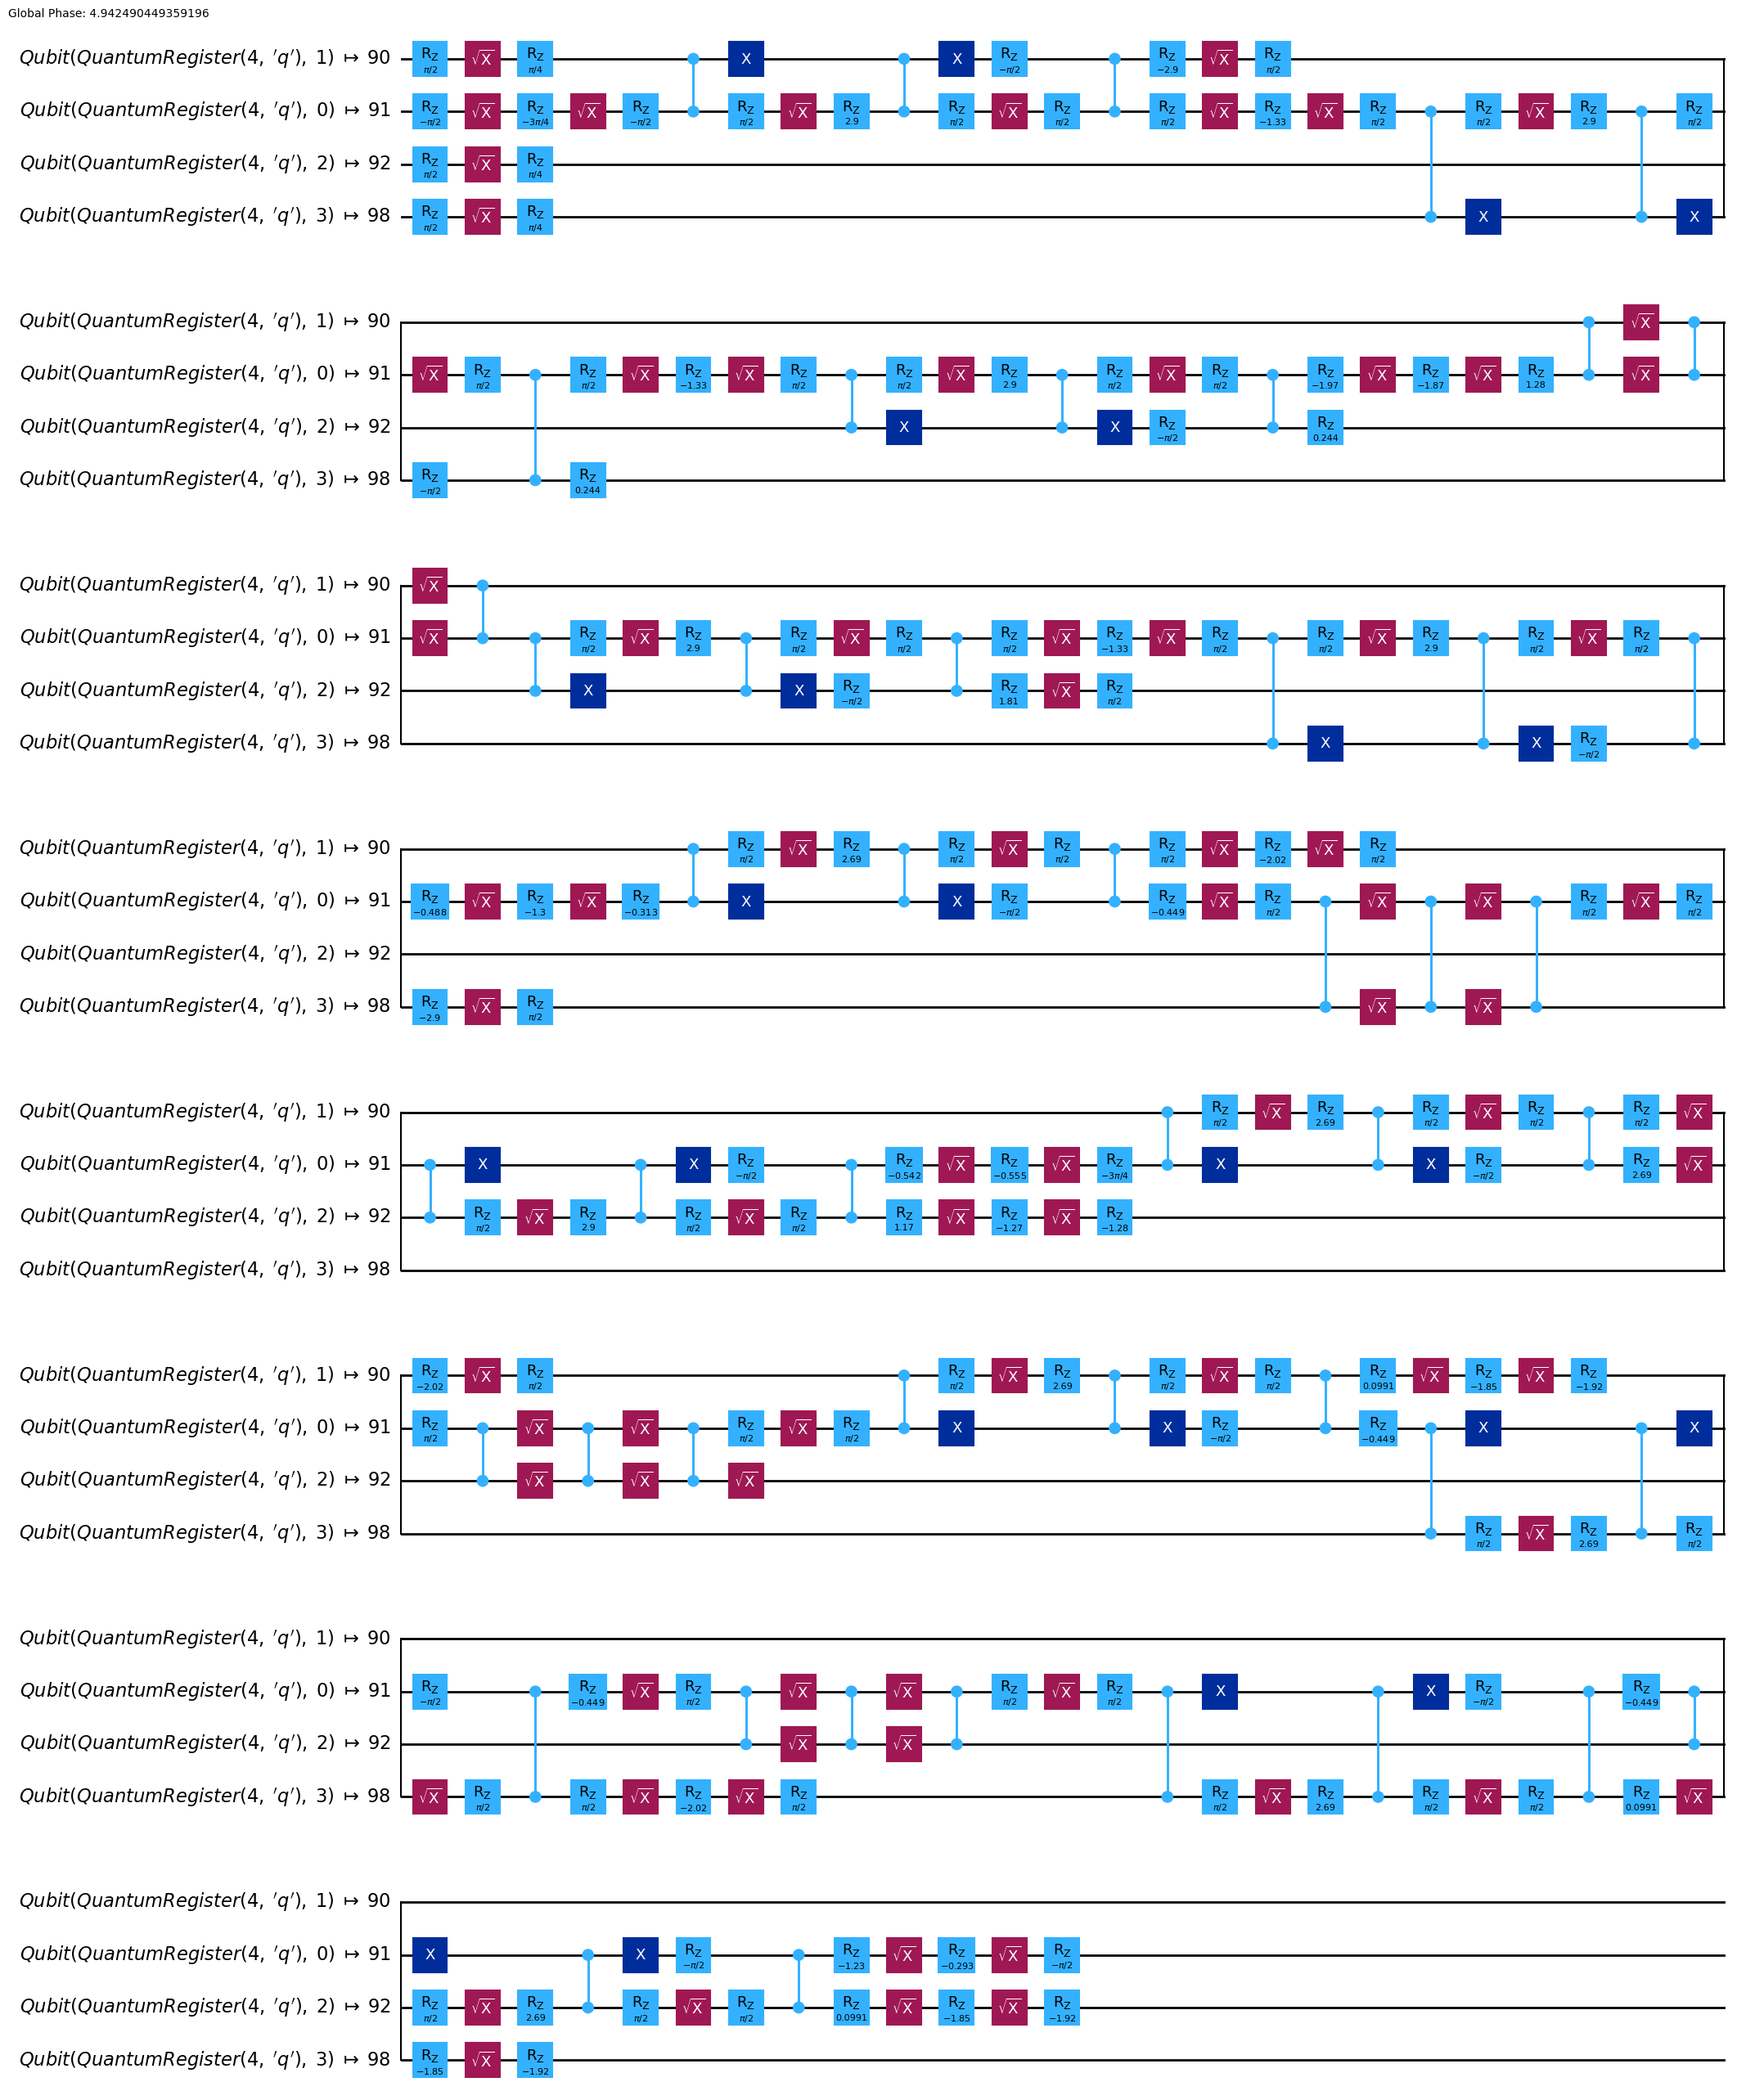

In [35]:
visualize_qasm_optimised("circuits/6.qasm")